# Modelo de Regressão (CinemaTicketRef Dataset)

In [268]:
#notebook




### Objetivo:
Tentar prever o preço total de vendas com base em outras variáveis

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

df = pd.read_csv('datasets/cinematicket_ref.csv', sep=",", header=0)

display(df.head(10))


# removendo string data, pois so tem filmes de 2018, e temos month, quarter, day em outras colunas
df = df.drop(['date'], axis=1)


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.98,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.69,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.57,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.95,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.55,150000.000000,4,258.064516,2018-05-05,5,2,5


### Tratamento de dados

procurando celulas vazias

In [270]:

missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print('porcentagem de valores faltando', (total_missing/total_cells) * 100)

print(df.isnull().sum())

porcentagem de valores faltando 0.013493004147209754
film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
month             0
quarter           0
day               0
dtype: int64


preenchendo as celulas vazias com a media de cada coluna

In [271]:
# vamos preencher celulas vazias com a media de cada coluna

mean_occurrence = df['occu_perc'].mean()
mean_capacity = df['capacity'].mean()

df['occu_perc'].fillna(mean_occurrence, inplace=True)
df['capacity'].fillna(mean_capacity, inplace=True)

print(df.isnull().sum())

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64


procurando valores repetidos

In [272]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print(df.duplicated().sum())

print('Duplicated film codes: ', df['film_code'].duplicated().sum())
print('Duplicated cinema codes: ', df['cinema_code'].duplicated().sum())

# temos muitos codigos de cinemas e filmes duplicados que podem afetar nosso modelo, por isso vamos tira-los da equacao

106
0
Duplicated film codes:  142370
Duplicated cinema codes:  142172


In [273]:
display(df.describe())
columns = df.columns.tolist()

goodCorrelationColumns = []

for c in columns:
    if df[c].corr(df['total_sales'])*100 > 25 and c != 'total_sales':
        goodCorrelationColumns.append(c)
    print('column: ', c, ' correlation %%: %.2f' %(df[c].corr(df['total_sales'])*100))


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142418.000000,142418.000000,1.424180e+05,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000
mean,1519.011150,320.388806,1.233589e+07,140.048252,0.237519,3.931610,19.955654,81229.345104,139.810733,854.570147,6.779663,2.635938,16.106714
std,36.185319,159.703461,3.063769e+07,279.725269,2.924270,3.056189,22.638610,33237.810182,279.531300,952.528421,2.194240,0.808764,8.950213
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,277.777778,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.710000e+06,50.000000,0.000000,3.000000,10.360000,79440.559441,50.000000,525.980224,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.180000,100000.000000,143.000000,1037.768054,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


column:  film_code  correlation %: 1.02
column:  cinema_code  correlation %: -1.30
column:  total_sales  correlation %: 100.00
column:  tickets_sold  correlation %: 91.52
column:  tickets_out  correlation %: 6.69
column:  show_time  correlation %: 51.00
column:  occu_perc  correlation %: 41.40
column:  ticket_price  correlation %: 27.21
column:  ticket_use  correlation %: 91.51
column:  capacity  correlation %: 37.60
column:  month  correlation %: -8.01
column:  quarter  correlation %: -5.08
column:  day  correlation %: -0.08


In [274]:
cinema={}
# cinema["features"] = np.hstack([df.values[::, :2], df.values[::, 3:]])
# cinema["target"] = df.values[:, 2]

cinema["features"] = df[goodCorrelationColumns]
cinema["target"] = df['total_sales']


print(cinema['features'].shape)
print(cinema['target'].shape)

(142418, 6)
(142418,)


### Aplicando regressao linear

Mean squared error: 121646332266134.62
Coefficient of determination: 0.88


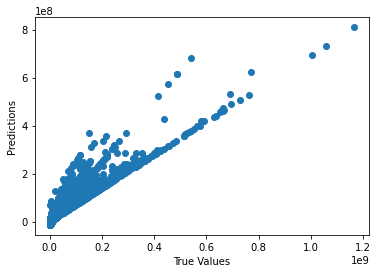

Coefficients: 
 [ 1.19114818e+05  2.79232917e+05 -9.99718744e+04  1.62845359e+02
 -1.63212857e+04 -1.72517383e+03]
Intercept: 
 -12928484.640526857
Score: 
 0.8754409073851191
Model: 
 LinearRegression()
scores: 
 [-1.32562860e+14 -1.18796985e+14 -1.17933152e+14 -1.24696020e+14
 -1.10161004e+14 -1.18469293e+14 -1.29274808e+14]
-121699160460984.1
7076703215688.411


In [275]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def regression_analysis(target, features):
    # split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

    # train the model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # make predictions
    y_pred = model.predict(x_test)

    # evaluate the model
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

    # plot the results
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

    # print the coefficients
    print('Coefficients: \n', model.coef_)
    # print the intercept
    print('Intercept: \n', model.intercept_)
    # print the score
    print('Score: \n', model.score(x_test, y_test))
    # print the model
    print('Model: \n', model)
    
    from sklearn.model_selection import cross_val_score
    
    scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
    print('scores: \n', scores)
    
    print(scores.mean())
    print(scores.std())

regression_analysis(cinema["target"], cinema["features"])


## Utilizando outros modelos de Regressão Linear para verificar o resultado

In [276]:
def norma_l2(X):
    X = X.astype(int)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

### Lasso Regression

In [277]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls_scores = cross_val_score(ls, norma_l2(cinema["features"]), cinema["target"], cv=7)

print('ls score: ', ls_scores.mean())


c:\Users\thiago\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.855e+18, tolerance: 1.295e+16
  model = cd_fast.enet_coordinate_descent(
c:\Users\thiago\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.919e+18, tolerance: 1.302e+16
  model = cd_fast.enet_coordinate_descent(
c:\Users\thiago\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.702e+18, toler

ls score:  0.8332024498650725


c:\Users\thiago\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.395e+18, tolerance: 1.226e+16
  model = cd_fast.enet_coordinate_descent(


### Ridge Regression

In [278]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(cinema["features"]), cinema["target"], cv=7,)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(cinema["features"]), cinema["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(cinema["features"]), cinema["target"])

print('rg alpha: ', rg.alpha_)

[0.81424783 0.7117432  0.84739831 0.893907   0.86866465 0.82599729
 0.87036798]
lr mean scores:  0.8331894676273419
rg mean scores:  0.8390185126961113
rg alpha:  0.00025


### ElasticNet Regression

In [279]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(cinema["features"]), cinema["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(cinema["features"]), cinema["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

ElasticNet mean scores:  0.06945690280773209
0.001
0.8


### RANSAC Regression

In [280]:
import matplotlib.pyplot as plt

# X = cinema["features"]
# Y = cinema["target"]

# print(X.shape, Y.shape)

# plt.scatter(X,Y)
# plt.show()

# x,y = cinema["features"], cinema["target"]
